# Machine Learning with Scikit-learn

### Soru 1:  Bir çalışanın maaş derecesinin tahminlenmesi

In [454]:
import pandas as pd
hr = pd.read_csv('insan_kaynaklari.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani', 'gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati', 'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi', 'sirketten_ayrildi', 'son_5_yilda_terfi_aldi', 'calistigi_bolum', 'maas_derecesi']

Sample data:


,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Our data is pretty clean, no missing values

In [455]:
hr.isnull().any()


memnuniyet_duzeyi                False
aldigi_degerlendirme_puani       False
gerceklestirdigi_proje_sayisi    False
aylik_ort_calisma_saati          False
sirkette_calistigi_yil_sayisi    False
is_kazasina_ugradi               False
sirketten_ayrildi                False
son_5_yilda_terfi_aldi           False
calistigi_bolum                  False
maas_derecesi                    False
dtype: bool

The data contains 14,999 employees and 10 features


In [456]:
hr.shape


(14999, 10)

The “sirketten_ayrildi” column is the outcome variable recording 1 and 0. 1 for employees who left the company and 0 for those who didn't.
The 'calistigi_bolum' column of the dataset has many categories and we need to reduce the categories for a better modeling. The 'calistigi_bolum' column has the following categories:

In [457]:
hr['calistigi_bolum'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Let us combine “technical”, “support” and “IT” together and call them “technical”.

In [458]:
import numpy as np
hr['calistigi_bolum']=np.where(hr['calistigi_bolum'] =='support', 'technical', hr['calistigi_bolum'])
hr['calistigi_bolum']=np.where(hr['calistigi_bolum'] =='IT', 'technical', hr['calistigi_bolum'])

After the change, this is how the department categories look:
[‘sales’ ‘accounting’ ‘hr’ ‘technical’ ‘management’ ‘product_mng’
‘marketing’ ‘RandD’]

Data Exploration


First of all, let us find out the number of employees who left the company and those who didn’t: 

In [459]:
hr['sirketten_ayrildi'].value_counts()


0    11428
1     3571
Name: sirketten_ayrildi, dtype: int64

There are 3571 employees left and 11428 employees stayed in our data. 

Let us get a sense of the numbers across these two classes: 

In [460]:
hr.groupby('sirketten_ayrildi').mean()


,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,son_5_yilda_terfi_aldi
sirketten_ayrildi,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


 Several observations:
 The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
 The average monthly work hours of employees who left the company is more than that of the employees who stayed.
 The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
 The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.
 We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [461]:
hr.groupby('calistigi_bolum').mean()


,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi
calistigi_bolum,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [462]:
hr.groupby('maas_derecesi').mean()


,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi
maas_derecesi,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


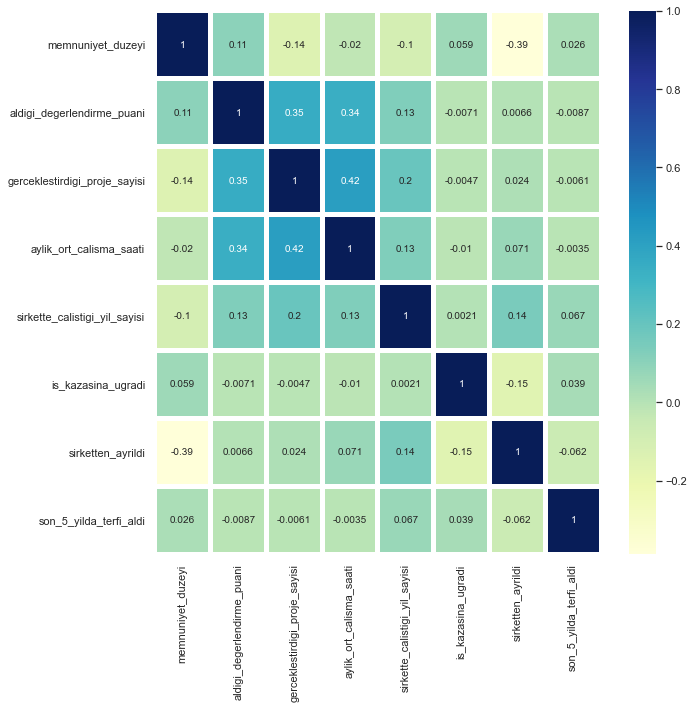

In [463]:
corr_matrix = hr.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu",linewidths=4.0)
plt.show()

Data Visualization

Let us visualize our data to get a much clearer picture of the data and the significant features.

Bar chart for department employee work for and the frequency of turnover.

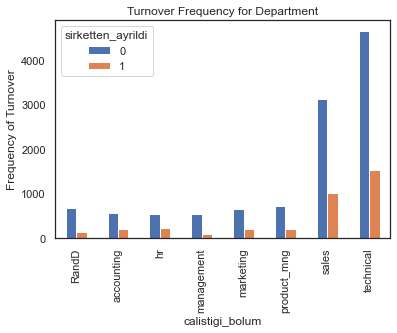

In [464]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.calistigi_bolum,hr.sirketten_ayrildi).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('calistigi_bolum')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable. 

Bar chart for employee salary level and the frequency of turnover

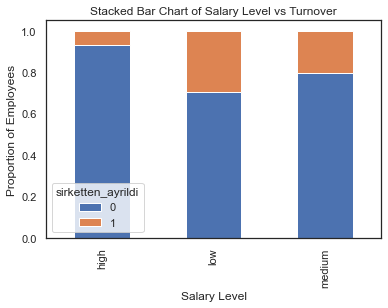

In [465]:
table=pd.crosstab(hr.maas_derecesi, hr.sirketten_ayrildi)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome. 

Histograms are often one of the most helpful tools we can use for numeric variables during the exploratory phrase.

Histogram of numeric variables

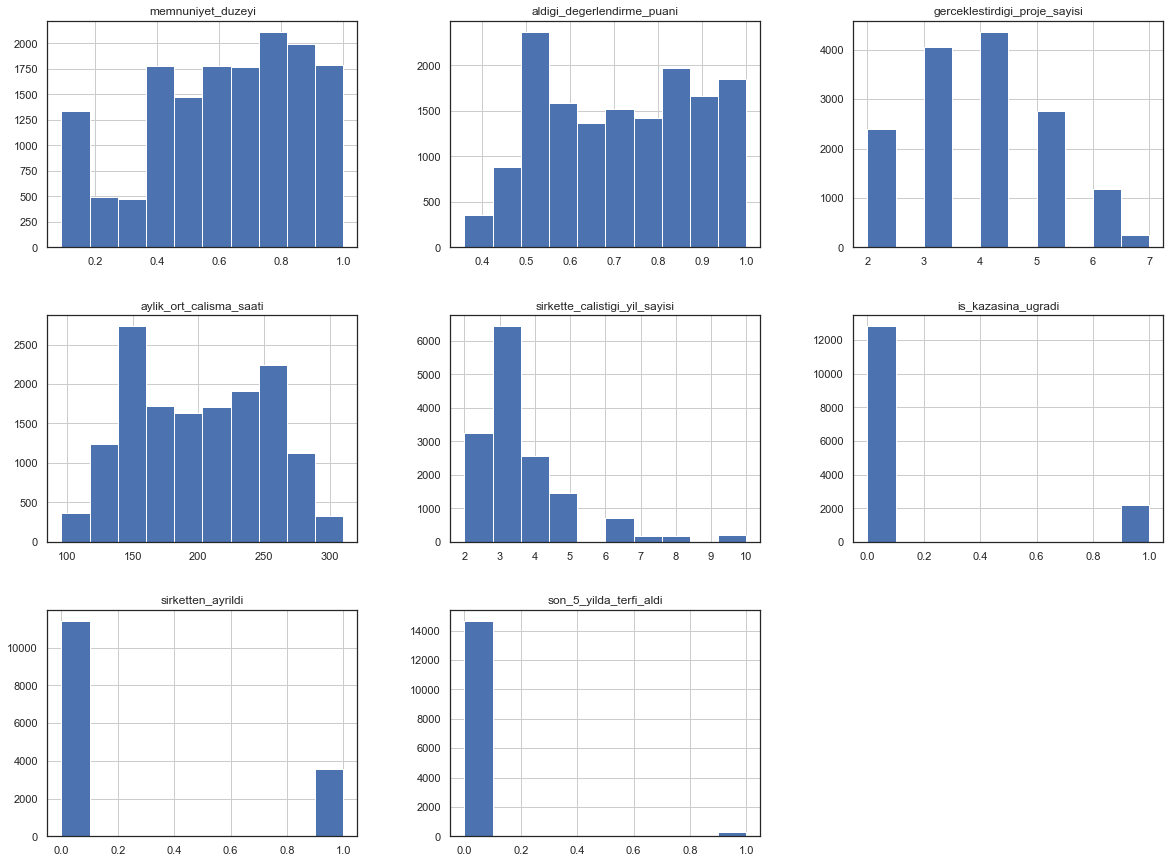

In [466]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

Creating Dummy Variables for Categorical Variables

There are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling. 

In [467]:
cat_vars=['calistigi_bolum','maas_derecesi']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

The actual categorical variable needs to be removed once the dummy variables have been created.

Column names after creating dummy variables for categorical variables:


In [468]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani',
       'gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi',
       'sirketten_ayrildi', 'son_5_yilda_terfi_aldi',
       'calistigi_bolum_RandD', 'calistigi_bolum_accounting',
       'calistigi_bolum_hr', 'calistigi_bolum_management',
       'calistigi_bolum_marketing', 'calistigi_bolum_product_mng',
       'calistigi_bolum_sales', 'calistigi_bolum_technical',
       'maas_derecesi_high', 'maas_derecesi_low', 'maas_derecesi_medium'],
      dtype=object)

The outcome variable is “sirketten_ayrildi”, and all the other variables are predictors.


In [469]:
hr_vars=hr.columns.values.tolist()
y=['sirketten_ayrildi']
X=[i for i in hr_vars if i not in y]

Feature Selection

The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.
Let’s use feature selection to help us decide which variables are significant that can predict employee turnover with great accuracy. There are total 18 columns in X, how about select 10?

In [470]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


We can see that RFE chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array.

In [471]:
cols=['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani', 'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi', 'son_5_yilda_terfi_aldi', 
      'calistigi_bolum_RandD', 'calistigi_bolum_hr', 'calistigi_bolum_management', 'maas_derecesi_high', 'maas_derecesi_low'] 
X=hr[cols]
y=hr['sirketten_ayrildi']

# Logistic Regression Model

In [472]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [473]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


# Random Forest

In [474]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [475]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.978


# Support Vector Machine

In [476]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [477]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.907


Random forest has the best accuracy.

# Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest model.

In [478]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=None)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.982


The average accuracy remains very close to the Random Forest model accuracy; hence, we can conclude that the model generalizes well.

# Precision and recall

We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.

# Random Forest

In [479]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


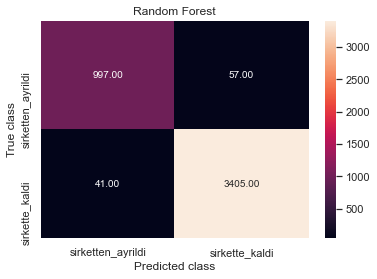

In [480]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] , yticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

# Logistic Regression


In [481]:
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


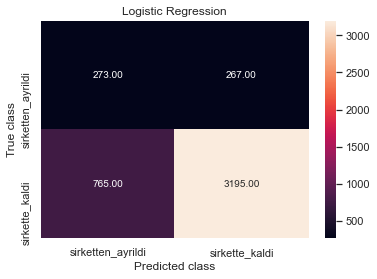

In [482]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] , yticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

# Support Vector Machine

In [483]:
print(classification_report(y_test, svc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3462
           1       0.77      0.85      0.81      1038

    accuracy                           0.91      4500
   macro avg       0.86      0.89      0.87      4500
weighted avg       0.91      0.91      0.91      4500



C:\Users\Mohamed Hasabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


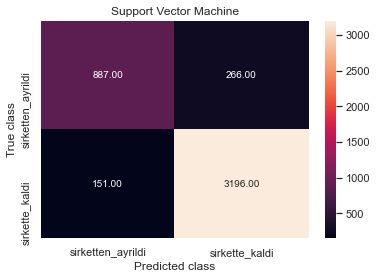

In [484]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] , yticklabels = ["sirketten_ayrildi", "sirkette_kaldi"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

When an employee left, how often does my classifier predict that correctly? This measurement is called “recall” and a quick look at these diagrams can demonstrate that random forest is clearly best for this criteria. Out of all the turnover cases, random forest correctly retrieved 999 out of 1038. This translates to a turnover “recall” of about 95% (997/1038), far better than logistic regression (26%) or support vector machines (85%).
When a classifier predicts an employee will leave, how often does that employee actually leave? This measurement is called “precision”. Random forest again outperforms the other two at about 95% precision (997 out of 1045) with logistic regression at about 51% (273 out of 540), and support vector machine at about 77% (887 out of 1150). 

# The ROC Curve

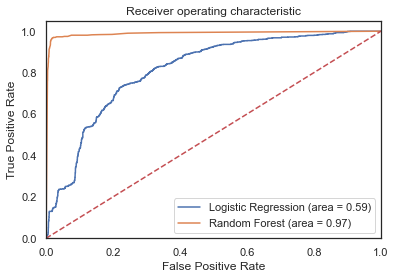

In [485]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Feature Importance for Random Forest Model

In [486]:
feature_labels = np.array(['memnuniyet_duzeyi', 'aldigi_degerlendirme_puani', 'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi', 'son_5_yilda_terfi_aldi', 
      'calistigi_bolum_RandD', 'calistigi_bolum_hr', 'calistigi_bolum_management', 'maas_derecesi_high', 'maas_derecesi_low'   ])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    
 

calistigi_bolum_management-0.25%
son_5_yilda_terfi_aldi-0.27%
calistigi_bolum_hr-0.31%
calistigi_bolum_RandD-0.31%
maas_derecesi_high-0.70%
maas_derecesi_low-1.21%
is_kazasina_ugradi-1.54%
aldigi_degerlendirme_puani-18.86%
sirkette_calistigi_yil_sayisi-26.56%
memnuniyet_duzeyi-49.98%


According to our Random Forest model, the above shows the most important features which influence whether an employee will leave the company, in ascending order.

### Soru 3: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

# Model Building
Label enoding

In [487]:
hr2 = pd.read_csv('insan_kaynaklari.csv')
hr2.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [488]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
hr2['maas_derecesi']=le.fit_transform(hr2['maas_derecesi'])
hr2['calistigi_bolum']=le.fit_transform(hr2['calistigi_bolum'])


# Splitting to training and test data set

In [489]:
y=hr2.sirketten_ayrildi
X = hr2.drop('sirketten_ayrildi',axis=1) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the data to model and predicting using Decision Tree
I use decision tree because i need to understand the features which is driving the employees to leave. This decision tree helps me to understand this. Its helps to understand the feature importance

In [490]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
depth = [i for i in range(5,21,1)]
samples = [i for i in range(50,500,50)]
parameters = dict(max_depth=depth, min_samples_leaf=samples)
param_search = GridSearchCV(dt, parameters)
param_search.fit(X_train, y_train)
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [491]:
dt1 = DecisionTreeClassifier(random_state=42,max_depth=6,min_samples_leaf=50)
dt1.fit(X_train, y_train)
y_dt_pred = dt1.predict(X_test)

In [492]:
feature_importances = dt1.feature_importances_
feature_list = list(X)
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])
relative_importances.sort_values(by="importance", ascending=False)

,importance
memnuniyet_duzeyi,0.569480
aldigi_degerlendirme_puani,0.145304
sirkette_calistigi_yil_sayisi,0.136982
gerceklestirdigi_proje_sayisi,0.091423
aylik_ort_calisma_saati,0.056164
calistigi_bolum,0.000647
is_kazasina_ugradi,0.000000
son_5_yilda_terfi_aldi,0.000000
maas_derecesi,0.000000


In [493]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:",metrics.precision_score(y_test, y_dt_pred))
print("Recall:",metrics.recall_score(y_test, y_dt_pred))

Accuracy: 0.9635555555555556
Precision: 0.9468503937007874
Recall: 0.8973880597014925


# Fitting the data to model and predicting using Gradient Boost

In [494]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [495]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [496]:
import seaborn as sns

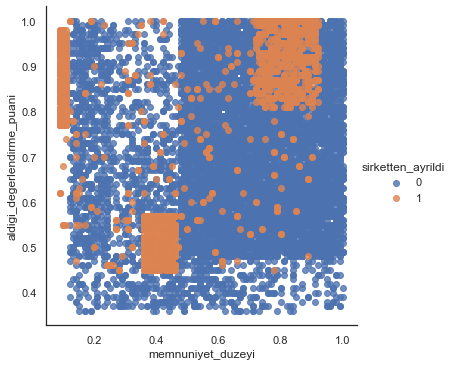

In [497]:
sns.lmplot(x='memnuniyet_duzeyi', y='aldigi_degerlendirme_puani', data=hr,
           fit_reg=False, # No regression line
           hue='sirketten_ayrildi')

Summary: There are 3 distinct clusters for employees who left the company Cluster 1: (Hard-working and Sad Employee) Satisfaction was below 0.2 and evaluations were greater than 0.75 which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2:(Bad and Sad Employee) Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3: (Hard-working and Happy Employee) Satisfaction between 0.7~1.0 and evaluations were greater than 0.8 which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

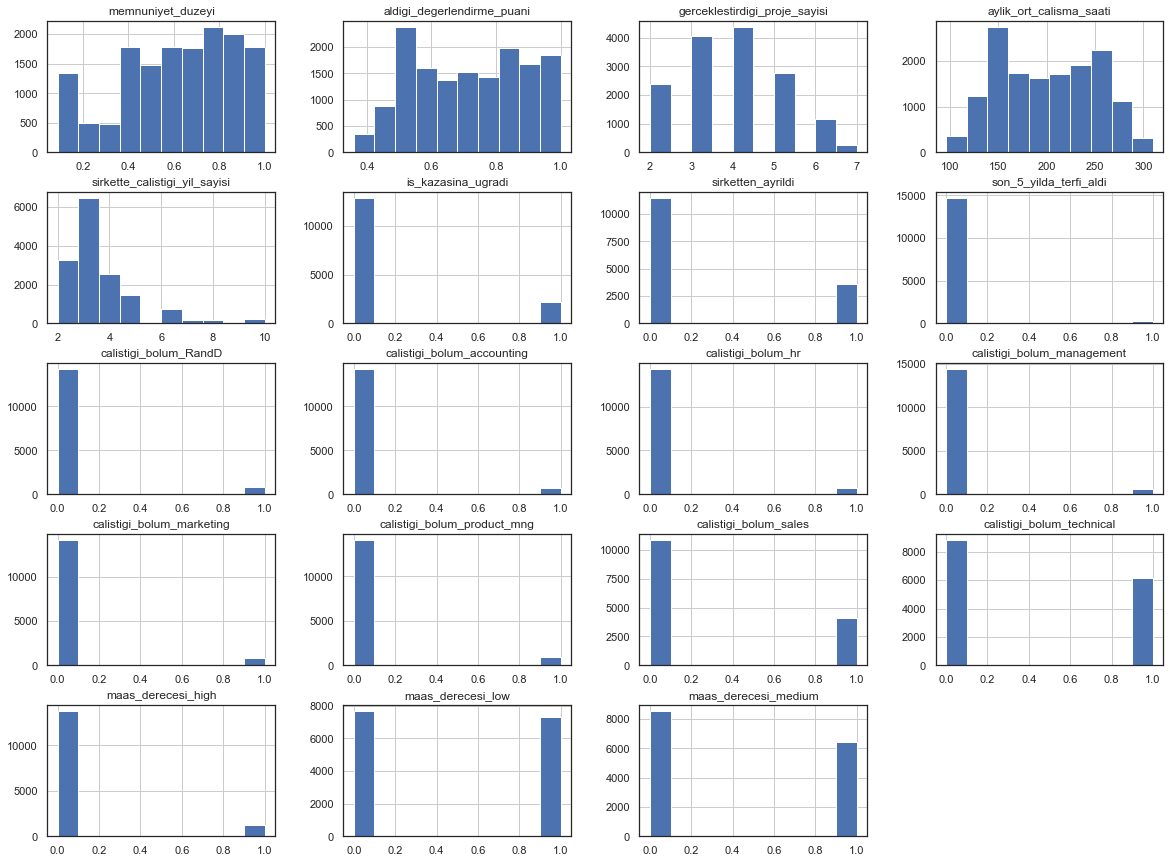

In [498]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

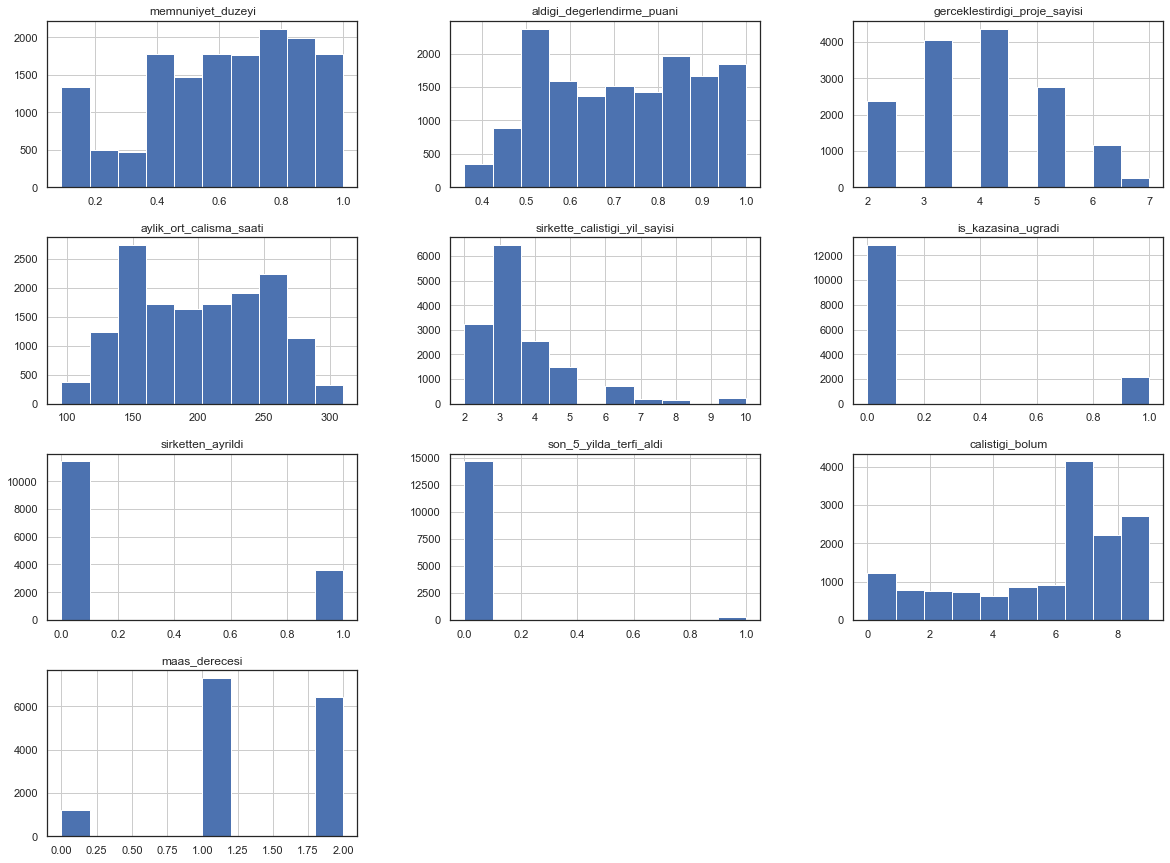

In [499]:
num_bins = 10
hr2.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()